In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("visualization_data.csv")
df.rename(columns={'parsed_salary': 'salary'}, inplace=True)

In [2]:
df.head()

,Unnamed: 0,job_type,company_name,company_rating,location,title,salary
0,0,Full-time,Healthmap Solutions,3.4,Remote,Accountant,59250.0
1,1,Full-time,SPRCHRGR,4.3,Remote,Accountant,70720.0
2,2,Full-time,eXp Realty,4.3,Remote,Accountant,102780.0
3,3,Full-time,Leon Medical Centers,4.1,Miami,Accountant,71671.0
4,4,Full-time,Stewart Systems Baking LLC,2.9,Plano,Accountant,126880.0


In [3]:
df["job_type"].unique()

array(['Full-time', 'Part-time'], dtype=object)

In [4]:
# Function to calculate outliers for each title
def find_outliers(group):
    q1 = group['salary'].quantile(0.25)  # First quartile (25%)
    q3 = group['salary'].quantile(0.75)  # Third quartile (75%)
    iqr = q3 - q1                        # Interquartile range (IQR)
    lower_bound = q1 - 1.5 * iqr         # Lower bound
    upper_bound = q3 + 1.5 * iqr         # Upper bound
    
    # Identify the rows that are not outliers
    return group[(group['salary'] >= lower_bound) & (group['salary'] <= upper_bound)]
    

df_full = df[df["job_type"] == 'Full-time']
df_part = df[df["job_type"] != 'Full-time']

# Apply the function to each group of title
df_full = df_full.groupby('title').apply(find_outliers).reset_index(drop=True)
df_part = df_part.groupby('title').apply(find_outliers).reset_index(drop=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_2184\655260650.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_full = df_full.groupby('title').apply(find_outliers).reset_index(drop=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_2184\655260650.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_part = df_part.groupby('title').apply(find_outliers).reset_index(drop=True)


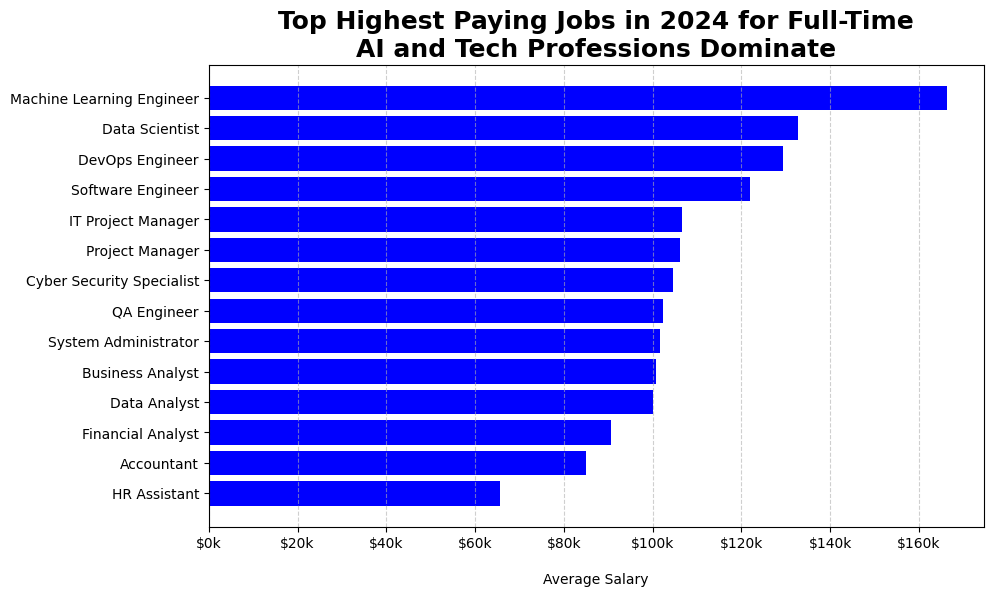

In [5]:
average_salary_by_profession = df_full.groupby('title')['salary'].mean().reset_index()
average_salary_by_profession_sorted = average_salary_by_profession.sort_values(by='salary', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(average_salary_by_profession_sorted['title'], average_salary_by_profession_sorted['salary'], color='blue')
plt.xlabel('\nAverage Salary',)
# plt.ylabel('Profession')
plt.title('Top Highest Paying Jobs in 2024 for Full-Time\nAI and Tech Professions Dominate',fontsize = 18,fontweight = 'bold')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000:,.0f}k'))
plt.grid(visible=True, axis='x', linestyle='--', alpha=0.6)
plt.show()

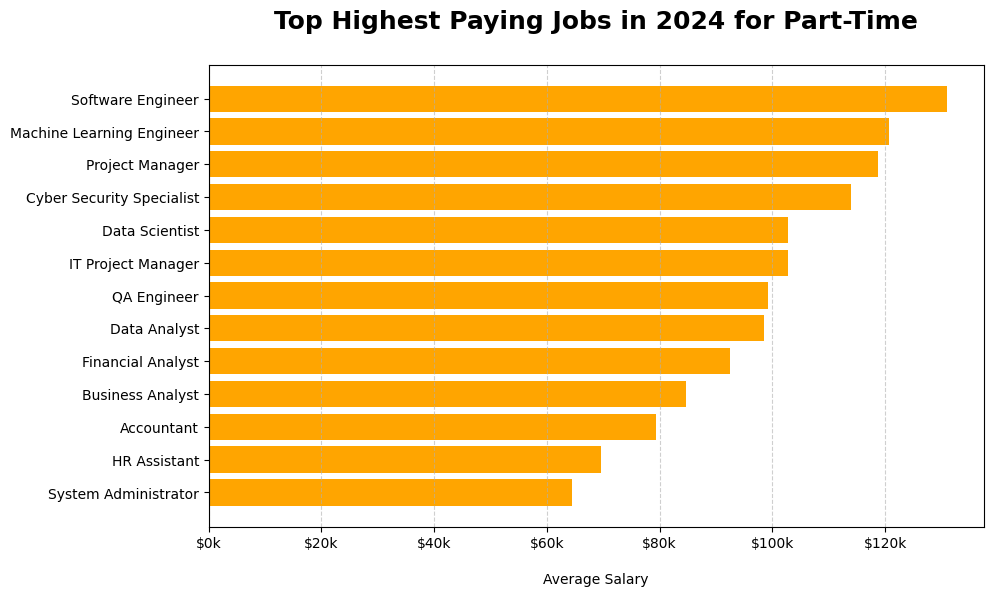

In [6]:
average_salary_by_profession = df_part.groupby('title')['salary'].mean().reset_index()
average_salary_by_profession_sorted = average_salary_by_profession.sort_values(by='salary', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(average_salary_by_profession_sorted['title'], average_salary_by_profession_sorted['salary'], color='orange')
plt.xlabel('\nAverage Salary',)
# plt.ylabel('Profession')
plt.title('Top Highest Paying Jobs in 2024 for Part-Time\n',fontsize = 18,fontweight = 'bold')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000:,.0f}k'))
plt.grid(visible=True, axis='x', linestyle='--', alpha=0.6)
plt.show()

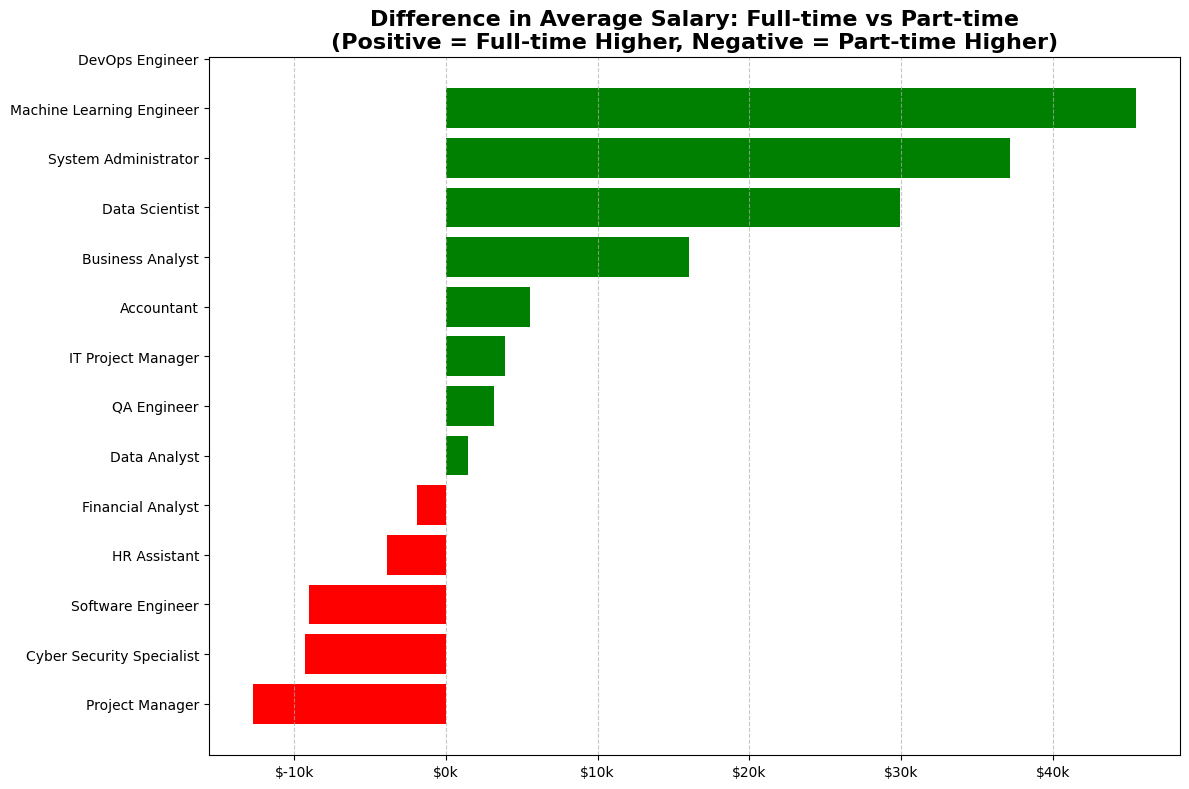

In [7]:
# Соединяем два DataFrame
df_combined = pd.concat([df_full, df_part])

# Рассчитываем среднюю зарплату по специальностям для обеих категорий
average_salary_comparison = df_combined.groupby(['title', 'job_type'])['salary'].mean().unstack()

# Вычисляем разницу между full-time и part-time
salary_difference = average_salary_comparison['Full-time'] - average_salary_comparison['Part-time']

# Сортировка разницы в зарплатах
salary_difference_sorted = salary_difference.sort_values()

# Параметры для построения графика
titles_sorted = salary_difference_sorted.index
index_sorted = np.arange(len(titles_sorted))

# Построение горизонтального графика с разницей в зарплатах
plt.figure(figsize=(12, 8))
plt.barh(index_sorted, salary_difference_sorted, color=np.where(salary_difference_sorted > 0, 'green', 'red'))

# Добавление подписей и заголовков
plt.title('Difference in Average Salary: Full-time vs Part-time\n(Positive = Full-time Higher, Negative = Part-time Higher)', 
          fontsize=16, fontweight='bold')

# Отображение названий профессий
plt.yticks(index_sorted, titles_sorted)

# Добавление сетки
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000:,.0f}k'))
plt.grid(visible=True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

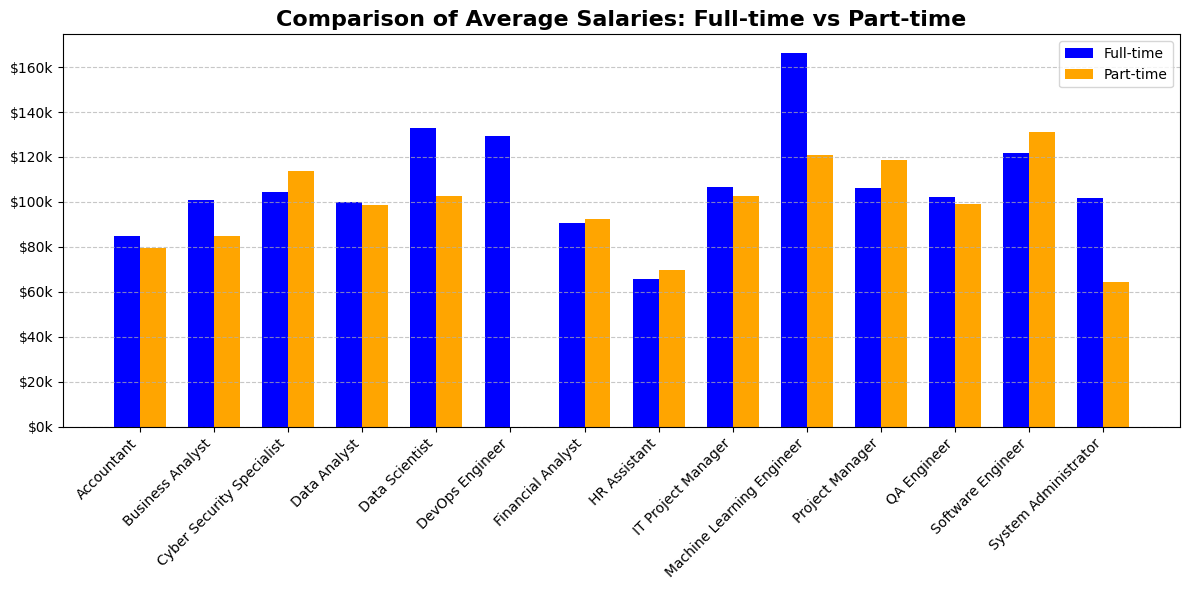

In [8]:
# Соединяем два DataFrame для сравнения
df_combined = pd.concat([df_full, df_part])

# Рассчитываем среднюю зарплату по специальностям для обеих категорий
average_salary_comparison = df_combined.groupby(['title', 'job_type'])['salary'].mean().unstack()

# Параметры для построения графика
titles = average_salary_comparison.index
full_time_salaries = average_salary_comparison['Full-time']
part_time_salaries = average_salary_comparison['Part-time']

# Определяем ширину столбцов и позицию
bar_width = 0.35
index = np.arange(len(titles))

# Построение графика
plt.figure(figsize=(12, 6))
plt.bar(index, full_time_salaries, bar_width, label='Full-time', color='blue')
plt.bar(index + bar_width, part_time_salaries, bar_width, label='Part-time', color='orange')

plt.title('Comparison of Average Salaries: Full-time vs Part-time', fontsize=16, fontweight='bold')
plt.xticks(index + bar_width / 2, titles, rotation=45, ha='right')

# Легенда и сетка
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000:,.0f}k'))
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_2184\1707818792.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y='title', x='count', data=combined_df, palette=reversed_palette)


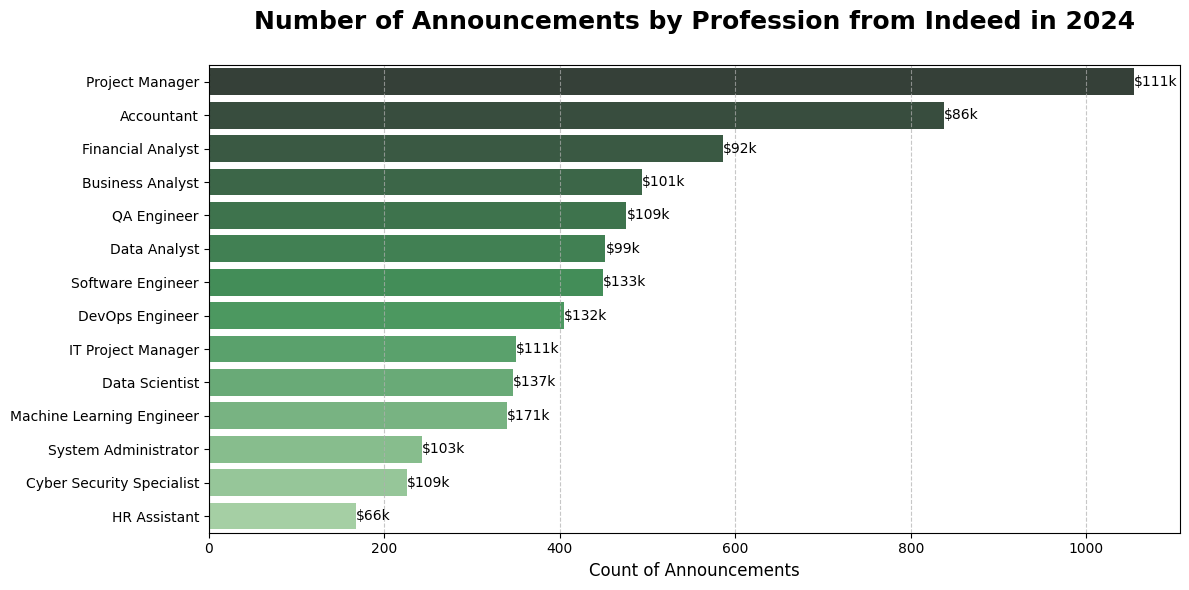

In [9]:
import seaborn as sns
# Calculate the counts of announcements
announcement_counts = df['title'].value_counts().reset_index()
announcement_counts.columns = ['title', 'count']

# Calculate the average salary by profession
average_salary = df.groupby('title')['salary'].mean().reset_index()

# Merge the two DataFrames on the 'title' column
combined_df = pd.merge(announcement_counts, average_salary, on='title')
reversed_palette = sns.color_palette("Greens_d", n_colors=len(combined_df))[::-1]

# # Create a horizontal bar chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(y='title', x='count', data=combined_df, palette=reversed_palette)

# Add title and labels
plt.title('Number of Announcements by Profession from Indeed in 2024\n', fontsize=18, fontweight='bold')
plt.xlabel('Count of Announcements', fontsize=12)
plt.ylabel('', fontsize=12)

# Add annotations for average salary on each bar
for index, row in combined_df.iterrows():
    plt.text(row['count'], index, f"${row['salary']/1000:.0f}k", color='black', va='center')

# Show grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

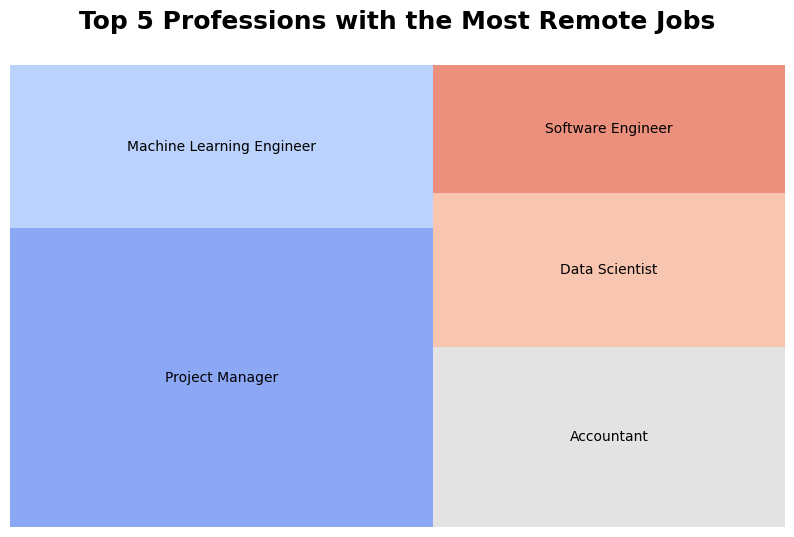

In [10]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Filter for remote jobs (assuming 'location' column contains 'Remote')
remote_jobs = df[df['location'] == 'Remote']

# Get the top 5 job titles with the most remote jobs
top_remote_jobs = remote_jobs['title'].value_counts().nlargest(5)

# Create the treemap
plt.figure(figsize=(10, 6))

# Generate a color palette using Seaborn
colors = sns.color_palette('coolwarm', len(top_remote_jobs))

# Plot the treemap
squarify.plot(sizes=top_remote_jobs.values, 
              label=top_remote_jobs.index, 
              color=colors, 
              alpha=0.8)

# Add title
plt.title('Top 5 Professions with the Most Remote Jobs\n',fontsize=18, fontweight='bold')

# Remove axes
plt.axis('off')

# Show the plot
plt.show()

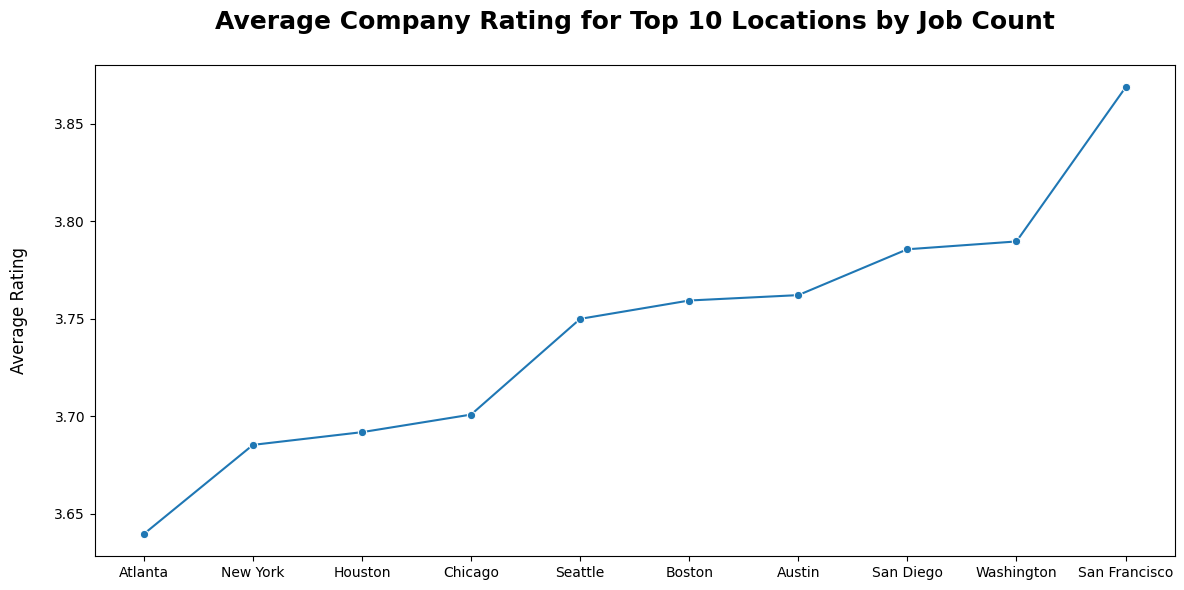

In [11]:
# Filter out 'Remote' and 'United States' from the location column
filtered_data = df[~df['location'].isin(['Remote', 'United States'])]

# Count the occurrences of each location and select the top 10
top_10_locations = filtered_data['location'].value_counts().head(10).index

# Filter the original data to keep only rows from the top 10 locations
top_10_data = filtered_data[filtered_data['location'].isin(top_10_locations)]

# Group by 'location' and calculate the average company rating for the top 10 locations
avg_rating_by_location = top_10_data.groupby('location')['company_rating'].mean().sort_values(ascending=True)

# Create a line chart for the top 10 locations with the lowest average company rating
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_by_location.index, y=avg_rating_by_location.values, marker='o')

# Add labels and title
plt.title('Average Company Rating for Top 10 Locations by Job Count\n', fontsize=18, fontweight="bold")
plt.xlabel('', fontsize=12)
plt.ylabel('Average Rating\n', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_2184\1125977776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_data.drop(columns = ['Unnamed: 0','title', 'salary', 'job_type'],inplace = True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_2184\1125977776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_data.drop_duplicates(inplace = True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_2184\1125977776.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass

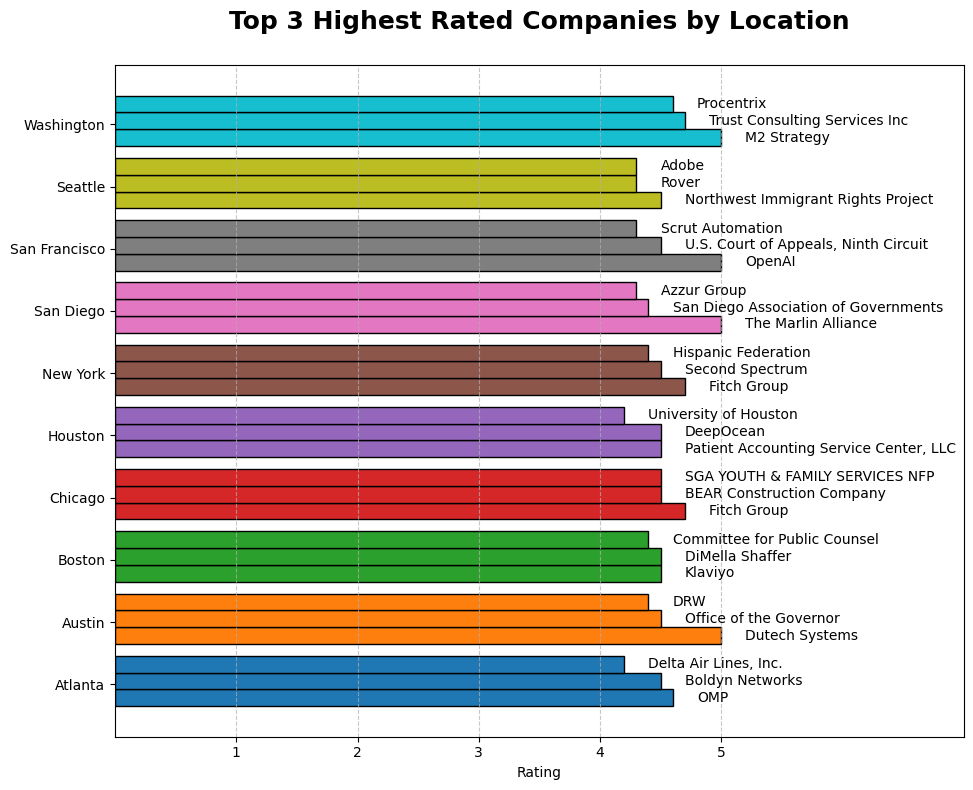

In [19]:
filtered_data = df[~df['location'].isin(['Remote', 'United States'])]
top_5_locations = filtered_data['location'].value_counts().head(10).index
top_5_data = filtered_data[filtered_data['location'].isin(top_5_locations)]
top_5_data.drop(columns = ['Unnamed: 0','title', 'salary', 'job_type'],inplace = True)
top_5_data.drop_duplicates(inplace = True)

top_companies_per_location = top_5_data.groupby('location').apply(
    lambda x: x.nlargest(3, 'company_rating')
).reset_index(drop=True)

# Plotting the grouped horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Get unique locations and the number of bars (top 3 companies per location)
locations = top_companies_per_location['location'].unique()
bar_height = 2.7  # Adjust height of each bar
bar_positions = np.arange(len(locations)) * 10  # Increase gaps between locations

# Plotting grouped horizontal bars
for i, location in enumerate(locations):
    loc_data = top_companies_per_location[top_companies_per_location['location'] == location]
    y_pos = bar_positions[i] + np.arange(len(loc_data)) * bar_height - (bar_height / 2)
    ax.barh(y_pos, loc_data['company_rating'], bar_height, label=location,edgecolor = 'black')
    ax.set_yticks(bar_positions + 0.8)
    ax.set_yticklabels(locations)

# Adding labels and title
ax.set_xlabel('Rating')
ax.set_title('Top 3 Highest Rated Companies by Location\n',fontsize = 18,fontweight = "bold")
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xlim(0, 7)

# Correctly placing company names next to each bar
for i, location in enumerate(locations):
    loc_data = top_companies_per_location[top_companies_per_location['location'] == location]
    for j, (name, rating) in enumerate(zip(loc_data['company_name'], loc_data['company_rating'])):
        y_label_pos = bar_positions[i] + j * bar_height - (bar_height / 2)  # Correct y position
        ax.text(rating + 0.2, y_label_pos, name, ha='left', va='center')  # Add small offset and set alignment

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


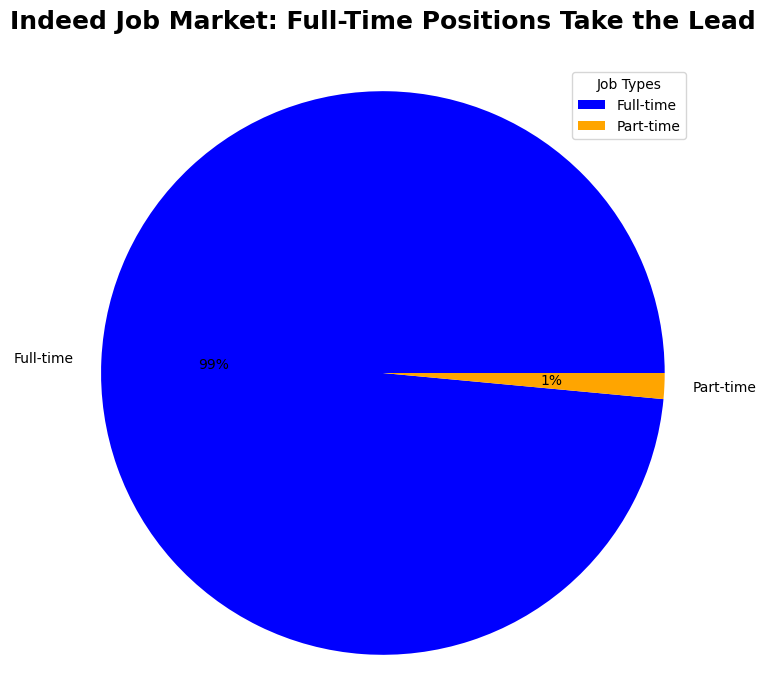

In [13]:
# Group by 'job_type' and count occurrences
job_type_counts = df['job_type'].value_counts()

# Define colors for the pie chart
colors = ['blue', 'orange']  # Specify your colors here

# Plotting the pie chart
plt.figure(figsize=(8, 8))
job_type_counts.plot(kind='pie', autopct='%1.0f%%', startangle=0, colors=colors, legend=False)

# Title and labels
plt.title('Indeed Job Market: Full-Time Positions Take the Lead\n', fontsize=18,fontweight = "bold")
plt.ylabel('')  # Remove the y-label
plt.xlabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

# Adding a legend
plt.legend(title='Job Types', loc='upper right', fontsize=10)

# Show the pie chart
plt.show()
